In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.neural_network import *
from sklearn.metrics import *

In [108]:
data = pd.read_csv('./diabetes2.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0


In [109]:
data.isna().any()

Pregnancies                  True
Glucose                     False
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                          True
Outcome                      True
dtype: bool

In [110]:
data['Pregnancies'] = data['Pregnancies'].fillna(data['Pregnancies'].mode()[0] )
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].mode()[0] )
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].mode()[0] )
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].mode()[0] )
data['BMI'] = data['BMI'].fillna(data['BMI'].mode()[0] )
data['Age'] = data['Age'].fillna(data['Age'].mode()[0] )
data['Outcome'] = data['Outcome'].fillna(7 )
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,1.0,137,40.0,35.0,168.0,43.1,2.288,22.0,1.0


In [111]:
data = data[data['Outcome'] != 7]
print(np.unique(data['Outcome']))
le = LabelEncoder()
data['Outcome'] = le.fit_transform(data['Outcome'])
print(np.unique(data['Outcome'], return_counts=True))

[0. 1.]
(array([0, 1]), array([499, 268]))


In [112]:
x_var = data.drop(columns='Outcome', axis=1)
y_var = data['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.3)
mlp = MLPClassifier(hidden_layer_sizes=(6,4), learning_rate_init=0.01, verbose=False, random_state=7)
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(6, 4), learning_rate_init=0.01,
              random_state=7)

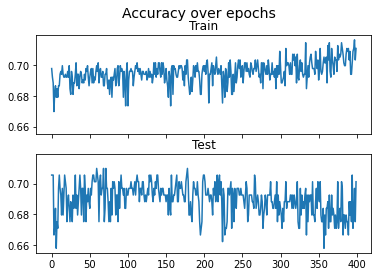

In [113]:

TRAIN_SAMPLES = x_train.shape[0]
EPOCHS = 400
BATCH = 300
CLASSES = np.unique(y_train)

scores_train = []
scores_test = []
epoch = 0

while epoch < EPOCHS:
    random_perm = np.random.permutation(x_train.shape[0])
    mini_batch_index = 0
    
    while True:
        indices = random_perm[mini_batch_index:mini_batch_index+BATCH]
        mlp.partial_fit(x_train.iloc[indices],y_train.iloc[indices],classes=CLASSES)
        mini_batch_index += BATCH
        
        if mini_batch_index >= TRAIN_SAMPLES:
            break
    
    scores_train.append(mlp.score(x_train,y_train))
    scores_test.append(mlp.score(x_test,y_test))
    epoch += 1
    
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()

/home/sal/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


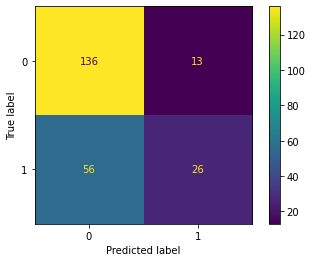

In [114]:
predictions = mlp.predict(x_test)
plot_confusion_matrix(mlp, x_test, y_test)

In [116]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80       149
           1       0.67      0.32      0.43        82

    accuracy                           0.70       231
   macro avg       0.69      0.61      0.61       231
weighted avg       0.69      0.70      0.67       231



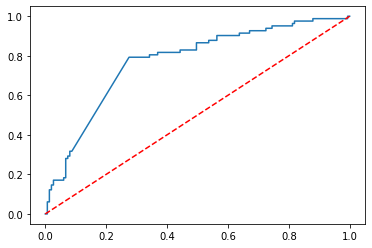

In [117]:
y_true = []
for i in y_test:
    if i == 0:
        y_true.append(0)
    else:
        y_true.append(1)

proba = mlp.predict_proba(x_test)[:,1]
fpr, tpr, _  = roc_curve(y_true, proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.show()